In [2]:
# Diabetic 1
# Not Diabetic 0

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [4]:
data = pd.read_csv("diabetes.csv")

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data.shape

(768, 9)

In [8]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [9]:
x = data.drop(['Outcome'], axis='columns')
y = data['Outcome']

In [10]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [11]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [12]:
scaler = StandardScaler()

In [13]:
scaler.fit(x)  # standarized the data

StandardScaler()

In [14]:
standardized_data = scaler.transform(x)

In [15]:
x = standardized_data
y = data['Outcome']

In [16]:
print(x)
print(y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=2)

In [19]:
data.shape, x_train.shape , x_test.shape

((768, 9), (614, 8), (154, 8))

In [20]:
from sklearn.svm import SVC

In [21]:
model = SVC()            # kernel = 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'
model.fit(x_train, y_train)

SVC()

In [22]:
model.score(x_test,y_test)

0.7272727272727273

In [23]:
model.score(x_train, y_train)

0.8289902280130294

In [24]:
y_predict = model.predict(x_test)

In [25]:
y_predict

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1],
      dtype=int64)

In [26]:
y_test

615    0
80     0
148    0
132    1
501    0
      ..
127    0
185    1
85     0
497    0
86     0
Name: Outcome, Length: 154, dtype: int64

In [27]:
from sklearn.metrics import confusion_matrix
cn = confusion_matrix(y_predict,y_test)
cn

array([[88, 30],
       [12, 24]], dtype=int64)

Text(24.0, 0.5, 'Truth')

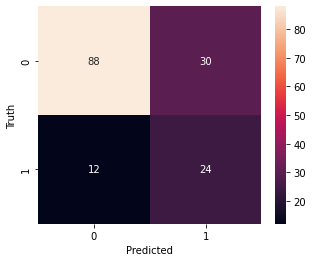

In [28]:
import seaborn as sn
plt.figure(figsize=(5,4))
sn.heatmap(cn, annot= True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [29]:
input_data = (1,122,90,51,220,49.7,0.325,31)

numpy_array= np.asarray(input_data)                   
reshaped_array = numpy_array.reshape(1,-1) 

str_data = scaler.transform(reshaped_array)
print(str_data)

prediction = model.predict(str_data)
print(prediction)

if (prediction[0]==0):
  print('The person is not Diabetic.')
else:
  print('The person is Diabetic.')


[[-0.84488505  0.03459802  1.08020025  1.9109189   1.21734653  2.24741262
  -0.44358386 -0.19067191]]
[1]
The person is Diabetic.
